In [1]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [58]:
mat1 = np.load(r"..\matrices\isolated-materials\float32\Material1.npy")
mat2 = np.load(r"..\matrices\isolated-materials\float32\Material2.npy")
mat3 = np.load(r"..\matrices\isolated-materials\float32\Material3.npy")
tran1 = np.load(r"..\matrices\isolated-materials\float32\Transition1.npy")
tran2 = np.load(r"..\matrices\isolated-materials\float32\Transition2.npy")

In [4]:
th_mat1 = (mat1 > 10765)
th_mat2 = (mat2 > 10760)
th_mat3 = (mat3 > 11070)

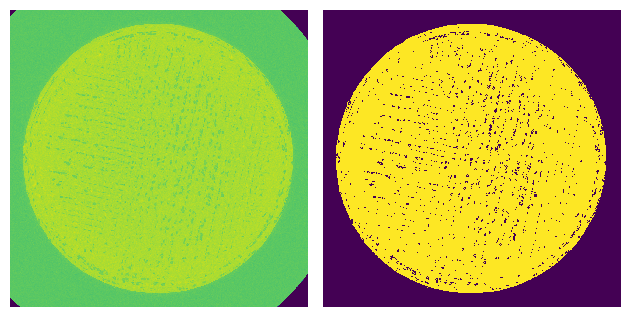

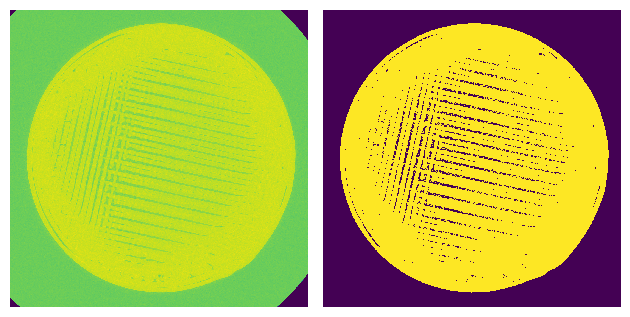

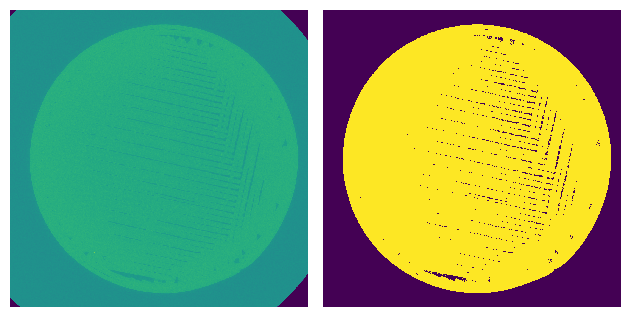

In [5]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(mat1[:,:,60], interpolation='nearest')
axs[1].imshow(th_mat1[:,:,60],interpolation='nearest')
for a in axs:
    a.axis(False)
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1,2)
axs[0].imshow(mat2[:,:,60], interpolation='nearest')
axs[1].imshow(th_mat2[:,:,60], interpolation='nearest')
for a in axs:
    a.axis(False)
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1,2)
axs[0].imshow(mat3[:,:,60], interpolation='nearest')
axs[1].imshow(th_mat3[:,:,60], interpolation='nearest')
for a in axs:
    a.axis(False)
fig.tight_layout()
plt.show()

In [6]:
full_mat = np.zeros((1085, 1085, 1789), dtype=np.uint8)

In [7]:
full_mat[:,:,41:281] = th_mat1
full_mat[:,:,770:1021] = th_mat2*2
full_mat[:,:,1520:1766] = th_mat3*3


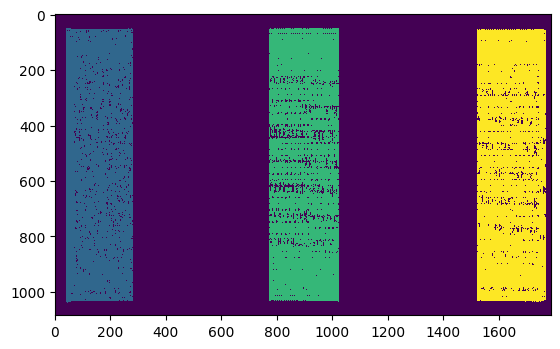

In [8]:
plt.imshow(full_mat[:, 543, :], interpolation='nearest')
plt.show()

In [9]:
mat1_tran1 = (11785 > tran1) * tran1
mat1_tran1 = (mat1_tran1 > 10765)
mat2_tran1 = (tran1 > 11785)
th_tran1 = mat1_tran1 + 2*mat2_tran1

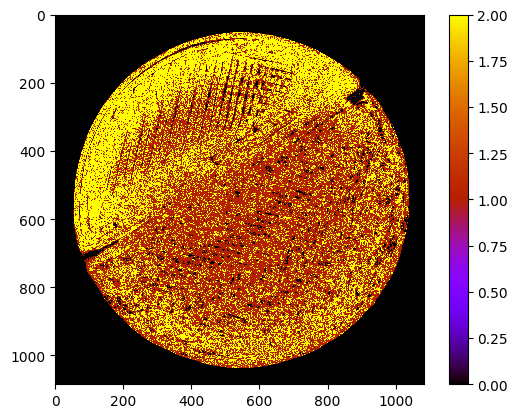

In [10]:
plt.imshow(th_tran1[:,:,200], vmin=0, vmax=2, cmap="gnuplot", interpolation='nearest')
plt.colorbar()
plt.show()

In [11]:
full_mat[:,:,281:770] = th_tran1

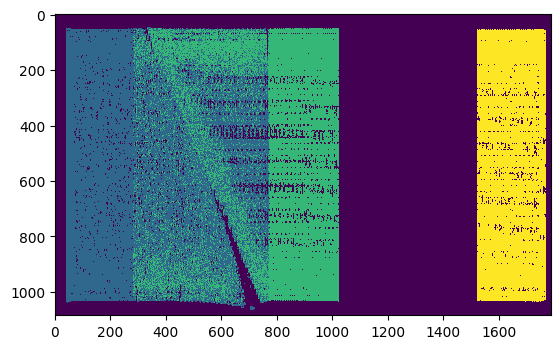

In [12]:
plt.imshow(full_mat[:, 543, :], interpolation='nearest')
plt.show()

In [13]:
mat2_tran2 = (12085 > tran2) * tran2
mat2_tran2 = (mat2_tran2 > 10760)
mat3_tran2 = (tran2 > 12085)
th_tran2 = mat2_tran2*2 + 3*mat3_tran2

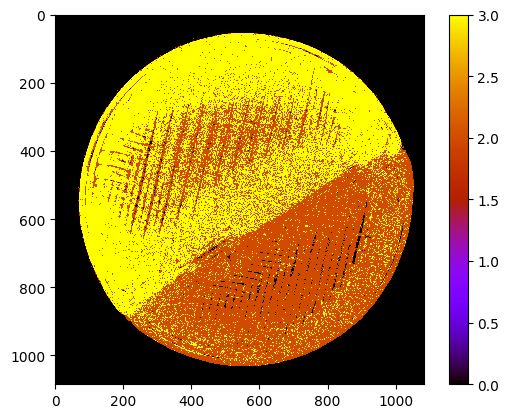

In [14]:
plt.imshow(th_tran2[:,:,300], vmin=0, vmax=3, cmap="gnuplot", interpolation='nearest')
plt.colorbar()
plt.show()

In [15]:
full_mat[:,:,1021:1520] = th_tran2
full_mat = np.array(full_mat, dtype=np.uint8)

In [20]:
np.save("../matrices/segmentation/otsu.npy", full_mat)

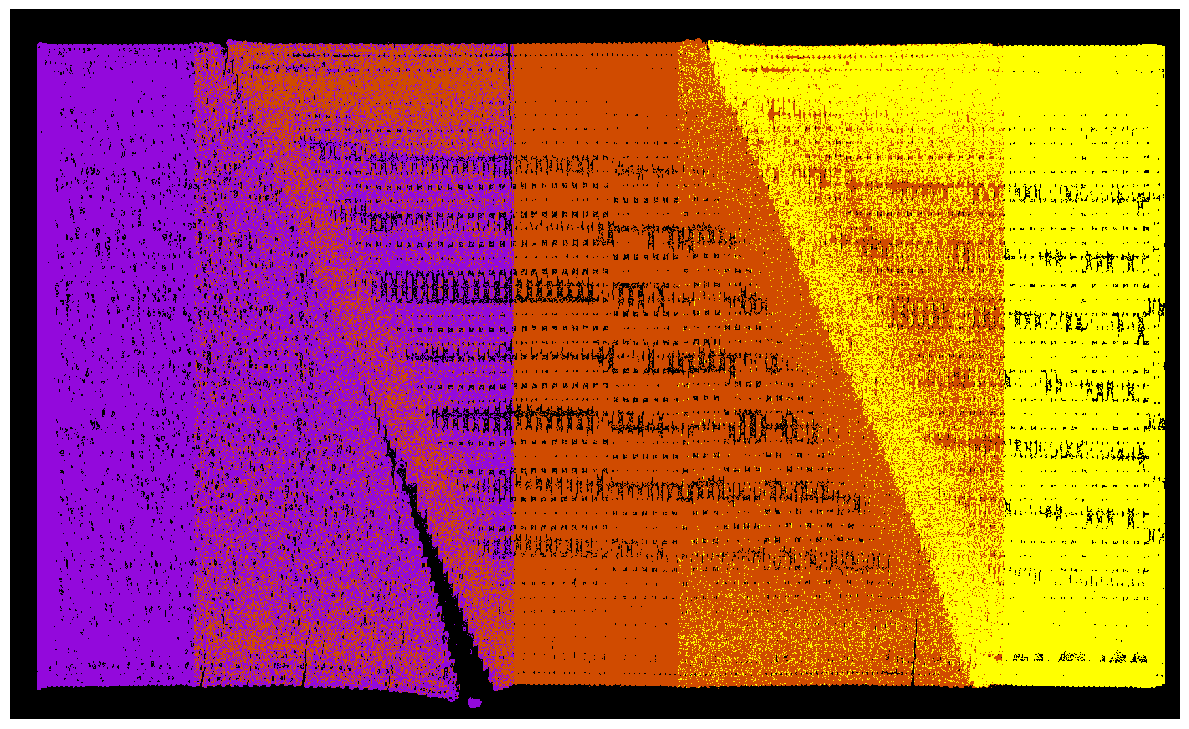

In [17]:
fig, ax= plt.subplots(1)
fig.set_size_inches(12,8)
ax.imshow(full_mat[:, 543, :], interpolation='nearest', cmap='gnuplot')
ax.axis(False)
fig.tight_layout()
plt.show()

In [18]:
kernel = np.array([[0.11111111111111,0.11111111111111,0.11111111111111],[0.11111111111111,0.11111111111111,0.11111111111111],[0.11111111111111,0.11111111111111,0.11111111111111]])
test = ndi.convolve(np.array(full_mat[:, 543, :], dtype=np.float32), kernel)
test = np.array(np.round(test), dtype=np.uint8)
test[full_mat[:,543,:] == 0] = 0

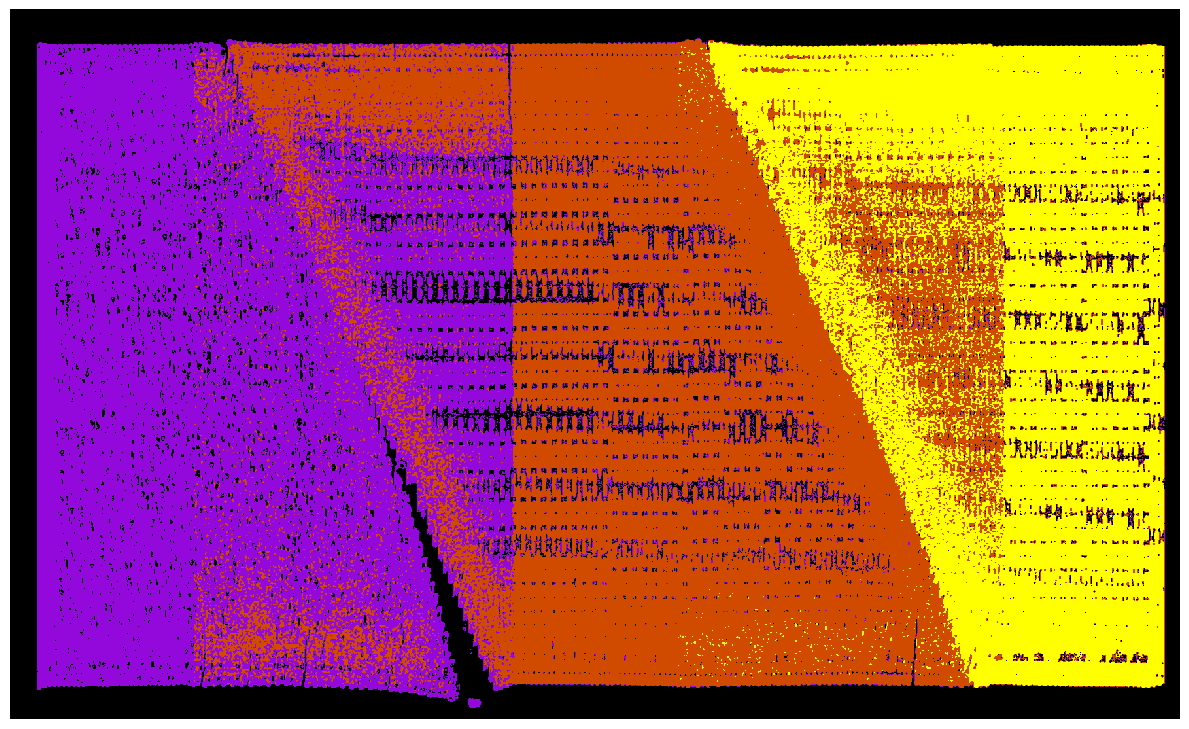

In [19]:
fig, ax= plt.subplots(1)
fig.set_size_inches(12,8)
ax.imshow(test, interpolation='nearest', cmap='gnuplot')
ax.axis(False)
fig.tight_layout()
plt.show()

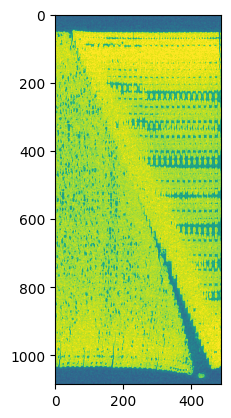

In [67]:
plt.imshow(tran1[:,1085//2,:], vmin=9000, vmax=12000)
plt.show()

clone1 = tran1.copy()

In [68]:
a = 1
b = 0.25
pt = np.sqrt(a**2 + b**2)
for i in range(tran1.shape[0]):
    for j in range(tran1.shape[1]):
        for k in range(tran1.shape[2]):
            if clone1[i,j,k] < 10760:
                clone1[i,j,k]=0
                continue
            if 0.42*(a*i + b*j)/pt + 22 <= k:
                clone1[i,j,k] = 2
            else:
                clone1[i,j,k] = 1

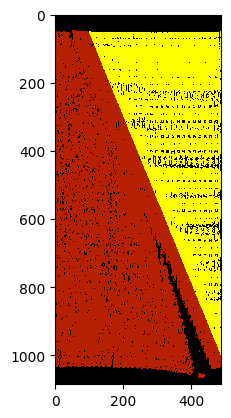

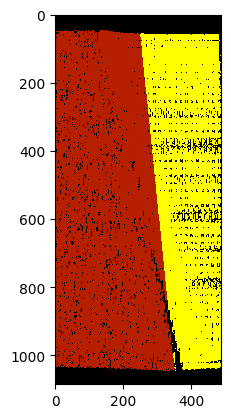

In [69]:
plt.imshow(clone1[:,1085//2,:], interpolation='nearest', cmap='gnuplot')
plt.show()
plt.imshow(clone1[543,:,:], interpolation='nearest', cmap='gnuplot')
plt.show()


In [ ]:
np.save(r"..\matrices\isolated-materials\float32\T1LABEL.npy", clone1)

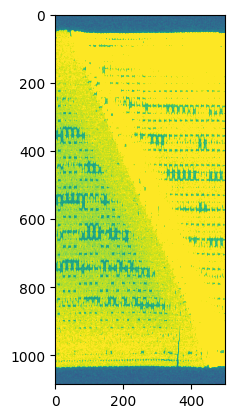

In [47]:
plt.imshow(tran2[:,1085//2,:], vmin=9000, vmax=12000)
plt.show()

clone2 = tran2.copy()

In [48]:
for i in range(tran2.shape[0]):
    for j in range(tran2.shape[1]):
        for k in range(tran2.shape[2]):
            if 0.42*i + 15 <= k and clone2[i,j,k] > 10760:
                clone2[i,j,k] = 3
            elif clone2[i,j,k] > 10760:
                clone2[i,j,k] = 2
            else:
                clone2[i,j,k] = 0

np.save(r"..\matrices\isolated-materials\float32\T2LABEL.npy", clone2)

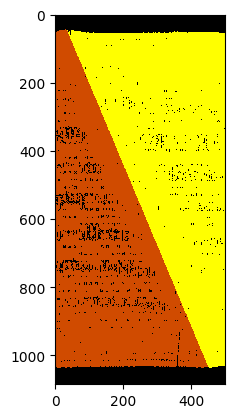

In [49]:
plt.imshow(clone2[:,1085//2,:], interpolation='nearest', cmap='gnuplot')
plt.show()

In [51]:
mat1 = np.load(r"..\matrices\isolated-materials\float32\Material1.npy")
mat2 = np.load(r"..\matrices\isolated-materials\float32\Material2.npy")
mat3 = np.load(r"..\matrices\isolated-materials\float32\Material3.npy")
tran1 = np.load(r"..\matrices\isolated-materials\float32\T1LABEL.npy")
tran2 = np.load(r"..\matrices\isolated-materials\float32\T2LABEL.npy")

th_mat1 = (mat1 > 10765)
th_mat2 = (mat2 > 10760)
th_mat3 = (mat3 > 11070)

full_mat = np.zeros((1085, 1085, 1789), dtype=np.uint8)

full_mat[:,:,41:281] = th_mat1
full_mat[:,:,770:1021] = th_mat2*2
full_mat[:,:,1520:1766] = th_mat3*3
full_mat[:,:,281:770] = tran1
full_mat[:,:,1021:1520] = tran2

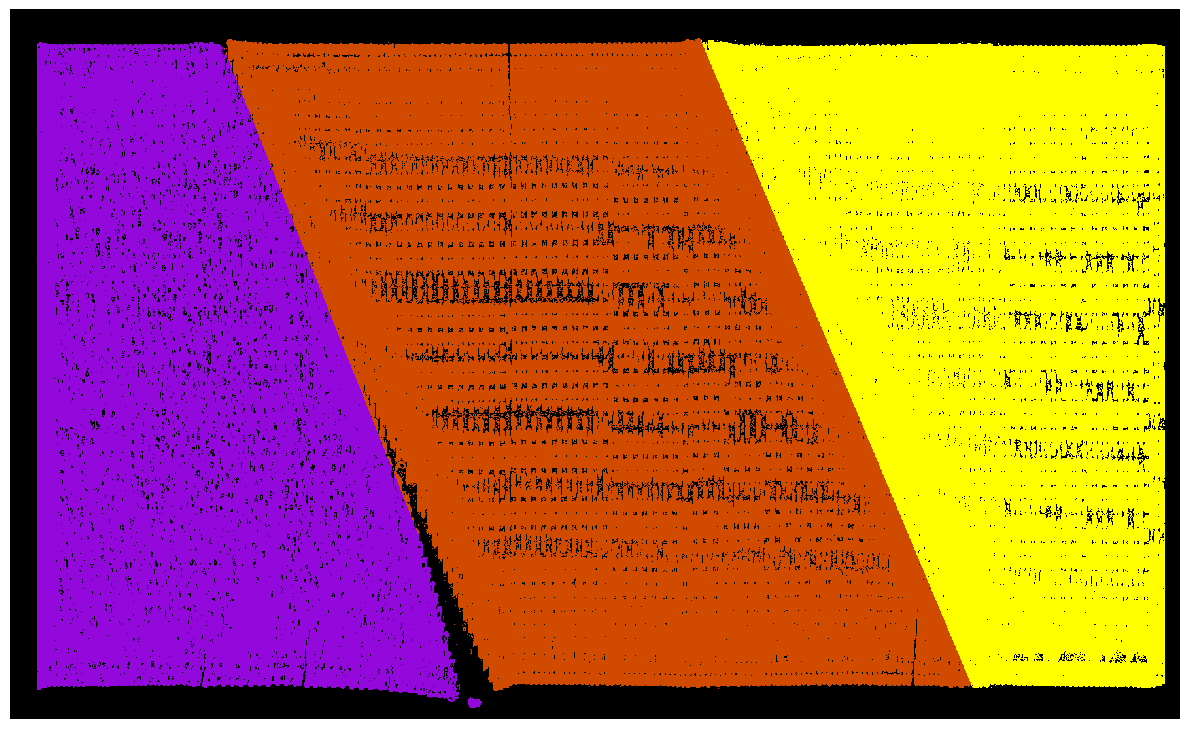

In [52]:
fig, ax= plt.subplots(1)
fig.set_size_inches(12,8)
ax.imshow(full_mat[:, 543, :], interpolation='nearest', cmap='gnuplot')
ax.axis(False)
fig.tight_layout()
plt.show()

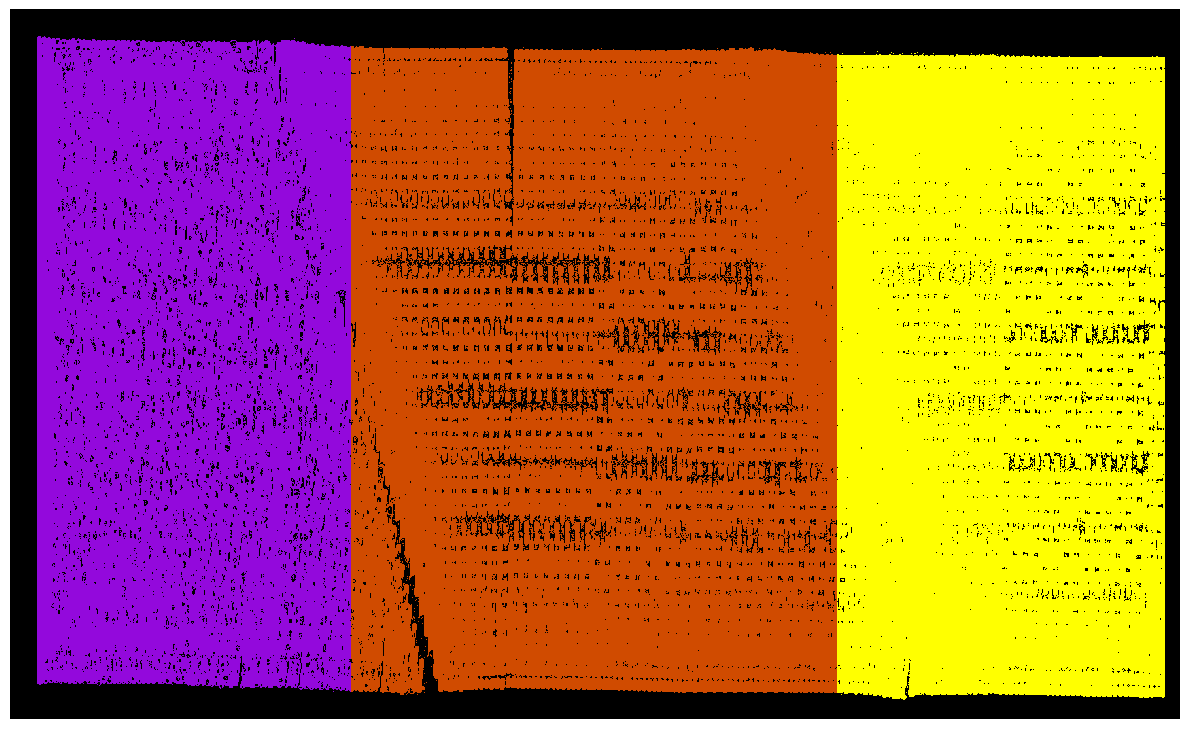

In [56]:
fig, ax= plt.subplots(1)
fig.set_size_inches(12,8)
ax.imshow(full_mat[543, :, :], interpolation='nearest', cmap='gnuplot')
ax.axis(False)
fig.tight_layout()
plt.show()